In [2]:
%pip install matplotlib
%pip install seaborn
%pip install scipy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

import seaborn as sns

import scipy
import pylab

Matplotlib is building the font cache; this may take a moment.


In [28]:
df = pd.read_csv("../data/merged-control-data.csv")
names = pd.read_csv("../data/scg-controls.csv")

In [29]:
df.head()

contig         run         gene diagnosis  read_count  length  \
0           NaN   ERR011265  NP_417778.1    nonIBD    11684574     0.0   
1   k119_3900_3  SRR2145375  NP_417635.1    nonIBD    13713609   930.0   
2           NaN  SRR6468714  NP_417762.1        UC    10753164     0.0   
3           NaN   ERR011173  YP_026260.1    nonIBD    12373439     0.0   
4  k119_67485_2  SRR6468634  NP_417780.1        UC    16121658   312.0   

   mapped  unmapped  net_mapped  length_right  average_depth  
0     0.0       0.0         0.0           0.0           0.00  
1    74.0      18.0        56.0         930.0           7.64  
2     0.0       0.0         0.0           0.0           0.00  
3     0.0       0.0         0.0           0.0           0.00  
4    34.0      10.0        24.0         312.0           8.99

In [30]:
df = df.merge(names[['symbol', 'organism', 'gene_full_name']], left_on='gene', right_on='symbol', how='left')
df['name'] = df[['symbol', 'organism', 'gene_full_name']].agg('-'.join, axis=1)

In [31]:
# Create a sum of mapped reads for each gene for each sample
# The mapped reads should be normalized by total reads in a sample as well as the length of the contig

df_simple = df.copy()

df_simple['diagnosis'] = df_simple['diagnosis'].str.lower().replace({'cd': 'IBD', 'uc': 'IBD', 'nonibd': 'Control'})

df_simple['mapped_norm_by_read_count'] = df_simple['mapped']/df_simple['read_count'] * 1000000

df_simple['mapped_norm_by_contig_length'] = 0.0
df_simple.loc[df_simple['length'] > 0, 'mapped_norm_by_contig_length'] = (
    (df_simple.loc[df_simple['length'] > 0, 'mapped'] / df_simple.loc[df_simple['length'] > 0, 'length']) * 1000
)

df_simple['mapped_norm_by_read_count_and_contig_length'] = 0.0
df_simple.loc[df_simple['length'] > 0, 'mapped_norm_by_read_count_and_contig_length'] = (
    (df_simple.loc[df_simple['length'] > 0, 'mapped_norm_by_read_count'] / df_simple.loc[df_simple['length'] > 0, 'length']) * 1000
)


df_filter = df[df['contig'].notna()]
df_simple_filter = df_simple[df_simple['contig'].notna()]

In [32]:
print('There are a minimum of 9 rows per sample')
df_simple.sort_values(['run', "gene"]).head(n=20)

There are a minimum of 9 rows per sample


contig        run         gene diagnosis  read_count  length  mapped  \
28200    NaN  ERR011087  NP_414711.1   Control    11640976     0.0     0.0   
21655    NaN  ERR011087  NP_414725.1   Control    11640976     0.0     0.0   
36114    NaN  ERR011087  NP_415431.1   Control    11640976     0.0     0.0   
40997    NaN  ERR011087  NP_416228.1   Control    11640976     0.0     0.0   
987      NaN  ERR011087  NP_416229.1   Control    11640976     0.0     0.0   
7433     NaN  ERR011087  NP_416690.1   Control    11640976     0.0     0.0   
30271    NaN  ERR011087  NP_417634.1   Control    11640976     0.0     0.0   
12168    NaN  ERR011087  NP_417635.1   Control    11640976     0.0     0.0   
1000     NaN  ERR011087  NP_417637.1   Control    11640976     0.0     0.0   
11660    NaN  ERR011087  NP_417697.1   Control    11640976     0.0     0.0   
41880    NaN  ERR011087  NP_417698.1   Control    11640976     0.0     0.0   
3296     NaN  ERR011087  NP_417756.1   Control    11640976     0.0     0.0   
43533    NaN  ERR011087  NP_417757.1   Control    11640976     0.0     0.0   
24700    NaN  ERR011087  NP_417760.1   Control    11640976     0.0     0.0   
35565    NaN  ERR011087  NP_417762.1   Control    11640976     0.0     0.0   
6556     NaN  ERR011087  NP_417763.1   Control    11640976     0.0     0.0   
1588     NaN  ERR011087  NP_417764.1   Control    11640976     0.0     0.0   
39010    NaN  ERR011087  NP_417765.1   Control    11640976     0.0     0.0   
28081    NaN  ERR011087  NP_417767.1   Control    11640976     0.0     0.0   
3334     NaN  ERR011087  NP_417768.1   Control    11640976     0.0     0.0   

       unmapped  net_mapped  length_right  average_depth       symbol  \
28200       0.0         0.0           0.0            0.0  NP_414711.1   
21655       0.0         0.0           0.0            0.0  NP_414725.1   
36114       0.0         0.0           0.0            0.0  NP_415431.1   
40997       0.0         0.0           0.0            0.0  NP_416228.1   
987         0.0         0.0           0.0            0.0  NP_416229.1   
7433        0.0         0.0           0.0            0.0  NP_416690.1   
30271       0.0         0.0           0.0            0.0  NP_417634.1   
12168       0.0         0.0           0.0            0.0  NP_417635.1   
1000        0.0         0.0           0.0            0.0  NP_417637.1   
11660       0.0         0.0           0.0            0.0  NP_417697.1   
41880       0.0         0.0           0.0            0.0  NP_417698.1   
3296        0.0         0.0           0.0            0.0  NP_417756.1   
43533       0.0         0.0           0.0            0.0  NP_417757.1   
24700       0.0         0.0           0.0            0.0  NP_417760.1   
35565       0.0         0.0           0.0            0.0  NP_417762.1   
6556        0.0         0.0           0.0            0.0  NP_417763.1   
1588        0.0         0.0           0.0            0.0  NP_417764.1   
39010       0.0         0.0           0.0            0.0  NP_417765.1   
28081       0.0         0.0           0.0            0.0  NP_417767.1   
3334        0.0         0.0           0.0            0.0  NP_417768.1   

          organism                           gene_full_name  \
28200  Escherichia                ribosomal protein S2 rpsB   
21655  Escherichia                         ribonuclease HII   
36114  Escherichia         30S ribosomal subunit protein S1   
40997  Escherichia    phenylalanyl-tRNA ligase subunit beta   
987    Escherichia   phenylalanyl-tRNA ligase subunit alpha   
7433   Escherichia        50S ribosomal subunit protein L25   
30271  Escherichia        30S ribosomal subunit protein S15   
12168  Escherichia              tRNA pseudouridine synthase   
1000   Escherichia  translation initiation factor IF-2 beta   
11660  Escherichia         30S ribosomal subunit protein S9   
41880  Escherichia        50S ribosomal subunit protein L13   
3296   Escherichia        30S ribosomal subunit protein S11   
43533  Escheri

In [8]:
print("But a sample may contain any number of contigs for a gene.\nI.e. a sample has a minimum of 9 rows but no maximum.")
df_simple.sort_values(['run', "gene"]).tail(n=20)

But a sample may contain any number of contigs for a gene.
I.e. a sample has a minimum of 9 rows but no maximum.


contig         run         gene diagnosis  read_count  length  \
4770              NaN  SRR6468718  NP_417765.1       IBD    10773619     0.0   
15205  k119_71785_106  SRR6468718  NP_417767.1       IBD    10773619   558.0   
40301             NaN  SRR6468718  NP_417768.1       IBD    10773619     0.0   
297               NaN  SRR6468718  NP_417769.1       IBD    10773619     0.0   
35624             NaN  SRR6468718  NP_417770.1       IBD    10773619     0.0   
6462              NaN  SRR6468718  NP_417771.1       IBD    10773619     0.0   
24596    k119_26880_3  SRR6468718  NP_417772.1       IBD    10773619   432.0   
17720             NaN  SRR6468718  NP_417773.1       IBD    10773619     0.0   
12788             NaN  SRR6468718  NP_417774.1       IBD    10773619     0.0   
28147             NaN  SRR6468718  NP_417775.1       IBD    10773619     0.0   
1663    k119_56464_11  SRR6468718  NP_417776.1       IBD    10773619   831.0   
13819             NaN  SRR6468718  NP_417778.1       IBD    10773619     0.0   
31980             NaN  SRR6468718  NP_417779.1       IBD    10773619     0.0   
16777             NaN  SRR6468718  NP_417780.1       IBD    10773619     0.0   
18887             NaN  SRR6468718  NP_417800.1       IBD    10773619     0.0   
22984    k119_31687_1  SRR6468718  NP_417801.1       IBD    10773619   378.0   
21745     k119_3662_2  SRR6468718  NP_418410.1       IBD    10773619   426.0   
25876             NaN  SRR6468718  NP_418411.1       IBD    10773619     0.0   
10750             NaN  SRR6468718  NP_418412.1       IBD    10773619     0.0   
6490              NaN  SRR6468718  YP_026260.1       IBD    10773619     0.0   

       mapped  unmapped  net_mapped  length_right  average_depth  \
4770      0.0       0.0         0.0           0.0           0.00   
15205   557.0     117.0       440.0         558.0          87.56   
40301     0.0       0.0         0.0           0.0           0.00   
297       0.0       0.0         0.0           0.0           0.00   
35624     0.0       0.0         0.0           0.0           0.00   
6462      0.0       0.0         0.0           0.0           0.00   
24596    32.0       6.0        26.0         432.0           6.15   
17720     0.0       0.0         0.0           0.0           0.00   
12788     0.0       0.0         0.0           0.0           0.00   
28147     0.0       0.0         0.0           0.0           0.00   
1663    120.0      22.0        98.0         831.0          13.10   
13819     0.0       0.0         0.0           0.0           0.00   
31980     0.0       0.0         0.0           0.0           0.00   
16777     0.0       0.0         0.0           0.0           0.00   
18887     0.0       0.0         0.0           0.0           0.00   
22984    45.0       3.0        42.0         378.0          10.35   
21745    69.0       7.0        62.0         426.0          13.16   
25876     0.0       0.0         0.0           0.0           0.00   
10750     0.0       0.0         0.0           0.0           0.00   
6490      0.0       0.0         0.0           0.0           0.00   

       mapped_norm_by_read_count  mapped_norm_by_contig_length  \
4770                    0.000000                      0.000000   
15205                  51.700362                    998.207885   
40301                   0.000000                      0.000000   
297                     0.000000                      0.000000   
35624                   0.000000                      0.000000   
6462                    0.000000                      0.000000   
24596                   2.970218                     74.074074   
17720                   0.000000                      0.000000   
12788                   0.000000                      0.000000   
28147                   0.000000                      0.000000   
1663                   11.138319                    144.404332   
13819                   0.000000                      0.000000   
31980                   0.000000               

In [9]:
df_simple['Total'] = df_simple.groupby(['run', 'gene'])['mapped_norm_by_read_count_and_contig_length'].transform('sum')
df_simple.sort_values(['run', "gene"]).tail(n=20)

contig         run         gene diagnosis  read_count  length  \
4770              NaN  SRR6468718  NP_417765.1       IBD    10773619     0.0   
15205  k119_71785_106  SRR6468718  NP_417767.1       IBD    10773619   558.0   
40301             NaN  SRR6468718  NP_417768.1       IBD    10773619     0.0   
297               NaN  SRR6468718  NP_417769.1       IBD    10773619     0.0   
35624             NaN  SRR6468718  NP_417770.1       IBD    10773619     0.0   
6462              NaN  SRR6468718  NP_417771.1       IBD    10773619     0.0   
24596    k119_26880_3  SRR6468718  NP_417772.1       IBD    10773619   432.0   
17720             NaN  SRR6468718  NP_417773.1       IBD    10773619     0.0   
12788             NaN  SRR6468718  NP_417774.1       IBD    10773619     0.0   
28147             NaN  SRR6468718  NP_417775.1       IBD    10773619     0.0   
1663    k119_56464_11  SRR6468718  NP_417776.1       IBD    10773619   831.0   
13819             NaN  SRR6468718  NP_417778.1       IBD    10773619     0.0   
31980             NaN  SRR6468718  NP_417779.1       IBD    10773619     0.0   
16777             NaN  SRR6468718  NP_417780.1       IBD    10773619     0.0   
18887             NaN  SRR6468718  NP_417800.1       IBD    10773619     0.0   
22984    k119_31687_1  SRR6468718  NP_417801.1       IBD    10773619   378.0   
21745     k119_3662_2  SRR6468718  NP_418410.1       IBD    10773619   426.0   
25876             NaN  SRR6468718  NP_418411.1       IBD    10773619     0.0   
10750             NaN  SRR6468718  NP_418412.1       IBD    10773619     0.0   
6490              NaN  SRR6468718  YP_026260.1       IBD    10773619     0.0   

       mapped  unmapped  net_mapped  length_right  average_depth  \
4770      0.0       0.0         0.0           0.0           0.00   
15205   557.0     117.0       440.0         558.0          87.56   
40301     0.0       0.0         0.0           0.0           0.00   
297       0.0       0.0         0.0           0.0           0.00   
35624     0.0       0.0         0.0           0.0           0.00   
6462      0.0       0.0         0.0           0.0           0.00   
24596    32.0       6.0        26.0         432.0           6.15   
17720     0.0       0.0         0.0           0.0           0.00   
12788     0.0       0.0         0.0           0.0           0.00   
28147     0.0       0.0         0.0           0.0           0.00   
1663    120.0      22.0        98.0         831.0          13.10   
13819     0.0       0.0         0.0           0.0           0.00   
31980     0.0       0.0         0.0           0.0           0.00   
16777     0.0       0.0         0.0           0.0           0.00   
18887     0.0       0.0         0.0           0.0           0.00   
22984    45.0       3.0        42.0         378.0          10.35   
21745    69.0       7.0        62.0         426.0          13.16   
25876     0.0       0.0         0.0           0.0           0.00   
10750     0.0       0.0         0.0           0.0           0.00   
6490      0.0       0.0         0.0           0.0           0.00   

       mapped_norm_by_read_count  mapped_norm_by_contig_length  \
4770                    0.000000                      0.000000   
15205                  51.700362                    998.207885   
40301                   0.000000                      0.000000   
297                     0.000000                      0.000000   
35624                   0.000000                      0.000000   
6462                    0.000000                      0.000000   
24596                   2.970218                     74.074074   
17720                   0.000000                      0.000000   
12788                   0.000000                      0.000000   
28147                   0.000000                      0.000000   
1663                   11.138319                    144.404332   
13819                   0.000000                      0.000000   
31980                   0.000000               

In [10]:
wide_table = df_simple.pivot_table(
    index='run',
    columns='gene',
    values='mapped_norm_by_read_count_and_contig_length',
    aggfunc='sum',  # sum seems to be the highest value and not the sum of values?
    fill_value=0
).reset_index()
wide_table

gene         run  NP_414711.1  NP_414725.1  NP_415431.1  NP_416228.1  \
0      ERR011087     0.000000     0.000000     0.000000     0.000000   
1      ERR011088     0.000000     0.000000     0.000000     0.000000   
2      ERR011089     0.000000     0.000000    47.310944     0.000000   
3      ERR011090     0.000000     0.000000     0.000000     0.000000   
4      ERR011091     0.000000    11.411530    32.768403     0.000000   
...          ...          ...          ...          ...          ...   
1055  SRR6468714     0.000000     0.000000     0.000000     0.000000   
1056  SRR6468715    20.881632    30.720510     0.000000     0.000000   
1057  SRR6468716     0.000000     0.000000     0.000000     0.000000   
1058  SRR6468717    58.377841     0.000000     0.000000     0.000000   
1059  SRR6468718    12.128391    64.028143     0.000000    11.752608   

gene  NP_416229.1  NP_416690.1  NP_417634.1  NP_417635.1  NP_417637.1  ...  \
0        0.000000          0.0     0.000000     0.000000     0.000000  ...   
1        0.000000          0.0     0.000000     0.000000     0.000000  ...   
2        0.000000          0.0     0.000000     0.000000     0.000000  ...   
3        0.000000          0.0     0.000000     0.000000     0.000000  ...   
4        0.000000          0.0     0.000000     0.000000     0.000000  ...   
...           ...          ...          ...          ...          ...  ...   
1055     0.000000          0.0    12.887070     0.000000     0.000000  ...   
1056     5.788238          0.0     0.000000     0.000000    68.401091  ...   
1057     0.000000          0.0    22.879377     0.000000     0.000000  ...   
1058     0.000000          0.0     0.000000     0.000000     0.000000  ...   
1059     0.000000          0.0     0.000000    23.587748     0.000000  ...   

gene  NP_417776.1  NP_417778.1  NP_417779.1  NP_417780.1  NP_417800.1  \
0        0.000000          0.0     0.000000          0.0          0.0   
1        0.000000          0.0     0.000000          0.0          0.0   
2        0.000000          0.0     0.000000          0.0          0.0   
3        0.000000          0.0     0.000000          0.0          0.0   
4        0.000000          0.0     0.000000          0.0          0.0   
...           ...          ...          ...          ...          ...   
1055     0.000000          0.0    63.668751          0.0          0.0   
1056    23.044239          0.0     3.448120          0.0          0.0   
1057     0.000000          0.0     0.000000          0.0          0.0   
1058     0.000000          0.0     0.000000          0.0          0.0   
1059    13.403512          0.0     0.000000          0.0          0.0   

gene  NP_417801.1  NP_418410.1  NP_418411.1  NP_418412.1  YP_026260.1  
0        0.000000     0.000000     0.000000     0.000000     0.000000  
1        0.000000     0.000000     0.000000     0.000000     0.000000  
2        0.000000     0.000000     0.000000     0.000000     0.000000  
3        0.000000     0.000000     0.000000     9.247539     0.000000  
4        0.000000     0.000000     0.000000     0.000000     0.000000  
...           ...          ...          ...          ...          ...  
1055     0.000000     0.000000    39.405036     0.000000     0.000000  
1056    11.496629     0.000000     0.000000     4.012898     5.627577  
1057     0.000000     0.000000    50.810744     0.000000     0.000000  
1058     0.000000     0.000000     0.000000     0.000000     0.000000  
1059    11.049919    15.034115     0.000000     0.000000     0.000000  

[1060 rows x 38 columns]

In [11]:
long_table = (
    df_simple
    .groupby(['run', 'gene', 'diagnosis'])['mapped_norm_by_read_count_and_contig_length']
    .sum()
    .reset_index()
)
long_table

run         gene diagnosis  \
0       ERR011087  NP_414711.1   Control   
1       ERR011087  NP_414725.1   Control   
2       ERR011087  NP_415431.1   Control   
3       ERR011087  NP_416228.1   Control   
4       ERR011087  NP_416229.1   Control   
...           ...          ...       ...   
39215  SRR6468718  NP_417801.1       IBD   
39216  SRR6468718  NP_418410.1       IBD   
39217  SRR6468718  NP_418411.1       IBD   
39218  SRR6468718  NP_418412.1       IBD   
39219  SRR6468718  YP_026260.1       IBD   

       mapped_norm_by_read_count_and_contig_length  
0                                         0.000000  
1                                         0.000000  
2                                         0.000000  
3                                         0.000000  
4                                         0.000000  
...                                            ...  
39215                                    11.049919  
39216                                    15.034115  
39217                                     0.000000  
39218                                     0.000000  
39219                                     0.000000  

[39220 rows x 4 columns]

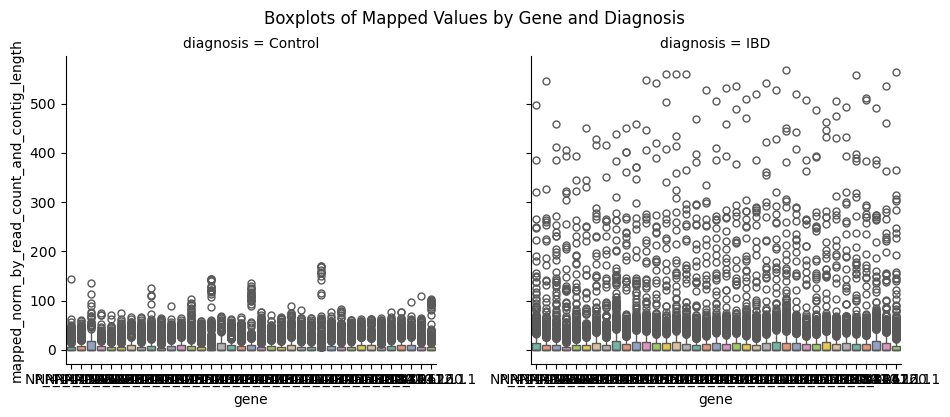

In [12]:
# While the distribution seems to show an increase in genes 
sns.catplot(
    data=long_table,
    x="gene",
    y="mapped_norm_by_read_count_and_contig_length",
    hue="gene", 
    kind="box",
    col="diagnosis",
    palette="Set2",
    height=4,
    aspect=1.2
)

plt.suptitle("Boxplots of Mapped Values by Gene and Diagnosis", y=1.03)
plt.show()

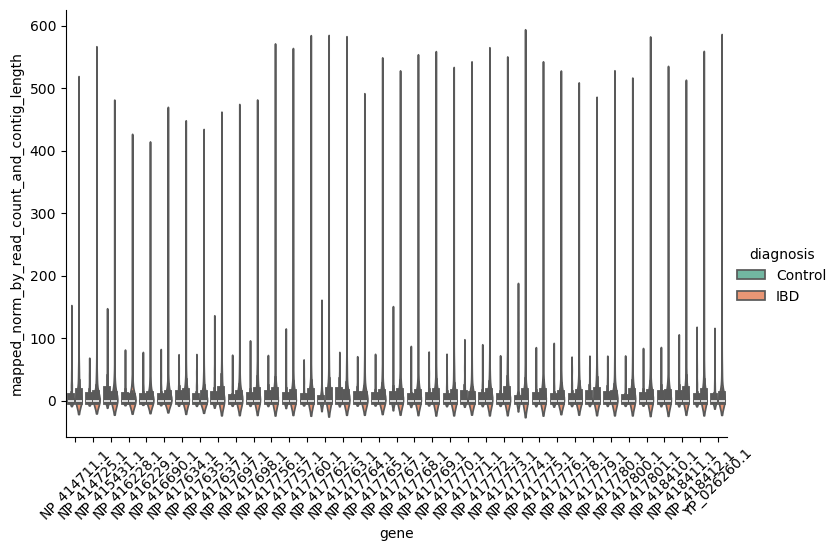

In [19]:
sns.catplot(
    data=long_table,
    x="gene",
    y="mapped_norm_by_read_count_and_contig_length",
    hue="diagnosis",
    kind="violin",
    palette="Set2",
    aspect=1.5
)
plt.xticks(rotation=45)

#plt.savefig('coverage_violin.png', dpi=300, bbox_inches='tight')
plt.show()

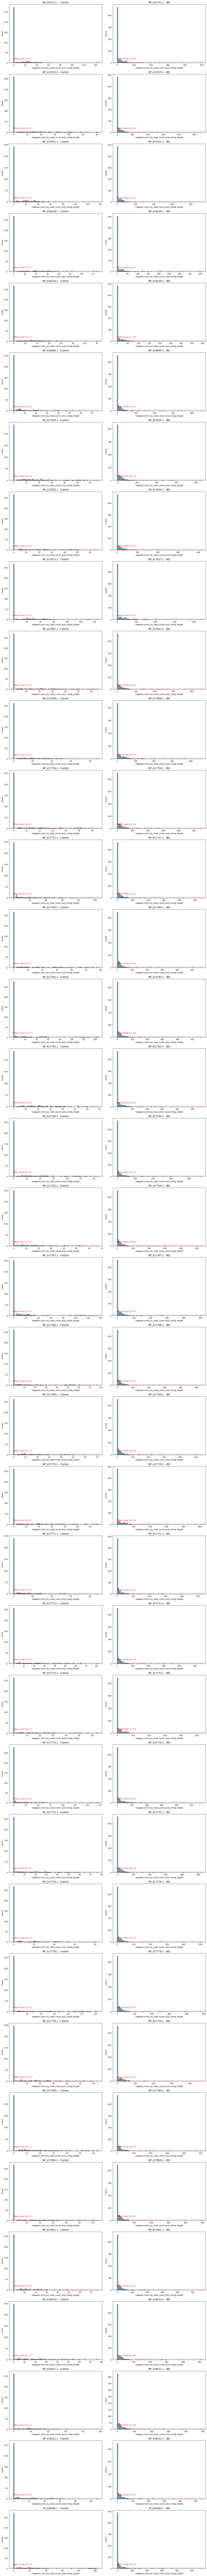

In [13]:
df = long_table[long_table['mapped_norm_by_read_count_and_contig_length'] > 0]
df = long_table
# Get unique gene and diagnosis combinations
genes = df['gene'].unique()
diagnoses = df['diagnosis'].unique()

fig, axes = plt.subplots(len(genes), len(diagnoses), figsize=(15, 5 * len(genes)), sharex=False, sharey=False)

for i, gene in enumerate(genes):
    for j, diagnosis in enumerate(diagnoses):
        ax = axes[i, j] if len(genes) > 1 else axes[j]  # handle 1-row case

        subset = df[(df['gene'] == gene) & (df['diagnosis'] == diagnosis)]

        # Plot histogram and get the bins
        counts, bins, patches = ax.hist(
            subset['mapped_norm_by_read_count_and_contig_length'],
            bins=100,
            color='skyblue',
            edgecolor='black'
        )

        # Calculate and annotate mean of y (i.e., mean bin count)
        mean_y = counts.mean()
        ax.axhline(mean_y, color='red', linestyle='--', linewidth=1)
        ax.text(
            bins[0], mean_y + max(counts) * 0.05,
            f'Mean count (y): {mean_y:.1f}',
            color='red'
        )

        ax.set_title(f'{gene} - {diagnosis}')
        ax.set_xlabel('mapped_norm_by_read_count_and_contig_length')
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


In [14]:
mean_depth = long_table.groupby(['gene', 'diagnosis'])['mapped_norm_by_read_count_and_contig_length'].mean().reset_index(name='mean_depth')
print(mean_depth)

           gene diagnosis  mean_depth
0   NP_414711.1   Control    6.881130
1   NP_414711.1       IBD   14.516372
2   NP_414725.1   Control    6.657060
3   NP_414725.1       IBD   12.284318
4   NP_415431.1   Control   10.211092
..          ...       ...         ...
69  NP_418411.1       IBD   15.755467
70  NP_418412.1   Control    7.140728
71  NP_418412.1       IBD   14.882085
72  YP_026260.1   Control    8.639598
73  YP_026260.1       IBD   13.172937

[74 rows x 3 columns]


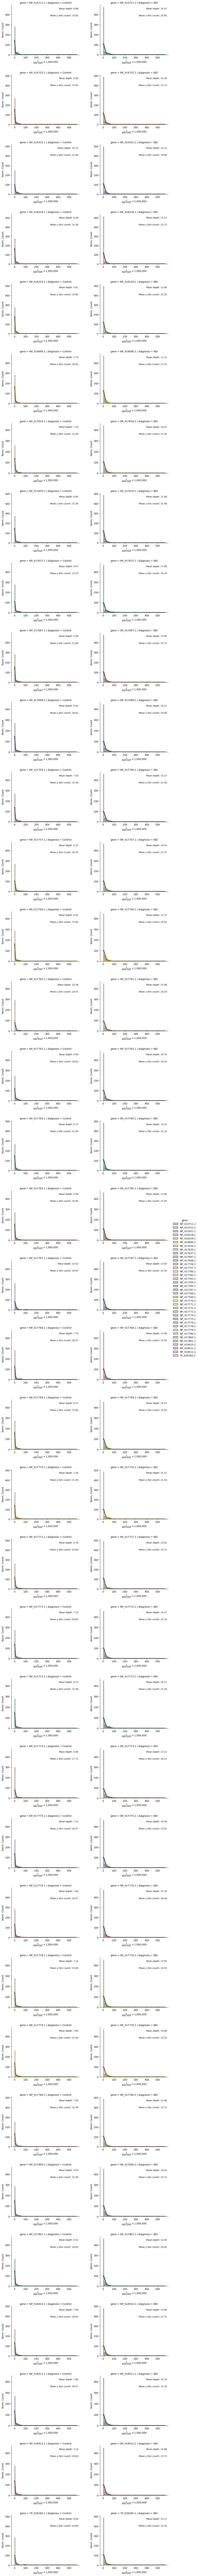

In [15]:
p = sns.displot(
    data=long_table,
    x="mapped_norm_by_read_count_and_contig_length",
    hue="gene",
    kind="hist",
    multiple="layer",
    bins=100,
    palette="Set2",
    col='diagnosis',
    row='gene',
    kde=True,
    #weights="weight",  # normalize using weights
    facet_kws={'sharey': False, 'sharex': False} # sharex must be false to label the x axis!
)

latex_xlabel = r'$\frac{\bar{x}}{\mathrm{read\ count}} \times 1{,}000{,}000$'
row_names = p.row_names

# Loop through each row and align y-limits
for row_idx, row_name in enumerate(row_names):
    # Get all axes in this row
    axes_row = p.axes[row_idx, :]
    
    # Find max y-limit in this row
    max_ylim = max(ax.get_ylim()[1] for ax in axes_row)
    
    # Set uniform y-limit across this row
    for ax in axes_row:
        ax.set_ylim(top=max_ylim)
        ax.set_ylabel("Norm. Count")

for ax in p.axes.flatten():
# Iterate over each Axes in the FacetGrid to customize KDE lines and bar edges
#for ax in p.axes.flatten():
    lines = [line for line in ax.lines if line.get_linestyle() == '-']
    
    # For each existing KDE line, add a black thicker line underneath it
    for line in lines:
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        
        # Plot black thicker line underneath
        ax.plot(
            xdata, ydata,
            color='black',
            linewidth=line.get_linewidth() + 2,  # thicker than original
            solid_capstyle='round',
            zorder=line.get_zorder() - 1  # behind original colored line
        )

    for patch in ax.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(0.5)

    # Get the bar heights (i.e., counts in each bin)
    bin_counts = [patch.get_height() for patch in ax.patches if patch.get_height() > 0]
    
    # Compute mean of the bin heights (mean y-value)
    mean_con = sum(bin_counts) / len(bin_counts) if bin_counts else 0

#for ax in p.axes.flatten():
    # Get gene and diagnosis from facet title
    title = ax.get_title()
    try:
        gene = title.split('|')[0].split('=')[1].strip()
        diagnosis = title.split('|')[1].split('=')[1].strip()
    except IndexError:
        continue  # skip if title parsing fails
    
    # Get the mean value for this facet
    row = mean_depth[(mean_depth['gene'] == gene) & (mean_depth['diagnosis'] == diagnosis)]
    if not row.empty:
        mean_dep = row['mean_depth'].values[0]
        ax.text(
            0.98, 0.95,
            f"Mean depth: {mean_dep:.2f}",
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
        )
        ax.text(
            0.98, 0.81,  # Lower position to stack nicely
            f"Mean y (bin count): {mean_con:.2f}",
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
        )


    ax.tick_params(labelbottom=True)
    ax.set_xlabel(latex_xlabel)

p.fig.subplots_adjust(hspace=0.4, wspace=0.3, bottom=0.20)  # add space for x axis

#plt.savefig('norm_coverage_count_distribution.png', dpi=200, bbox_inches='tight')
plt.show()

In [16]:
long_table_no_zeros = long_table[long_table['mapped_norm_by_read_count_and_contig_length'] != 0]
mean_depth_no_zeros = long_table_no_zeros.groupby(['gene', 'diagnosis'])['mapped_norm_by_read_count_and_contig_length'].mean().reset_index(name='mean_depth')
print(mean_depth_no_zeros)

           gene diagnosis  mean_depth
0   NP_414711.1   Control   25.856368
1   NP_414711.1       IBD   42.863794
2   NP_414725.1   Control   21.723039
3   NP_414725.1       IBD   37.068469
4   NP_415431.1   Control   29.219433
..          ...       ...         ...
69  NP_418411.1       IBD   38.575662
70  NP_418412.1   Control   23.301324
71  NP_418412.1       IBD   37.505035
72  YP_026260.1   Control   32.139304
73  YP_026260.1       IBD   40.459736

[74 rows x 3 columns]


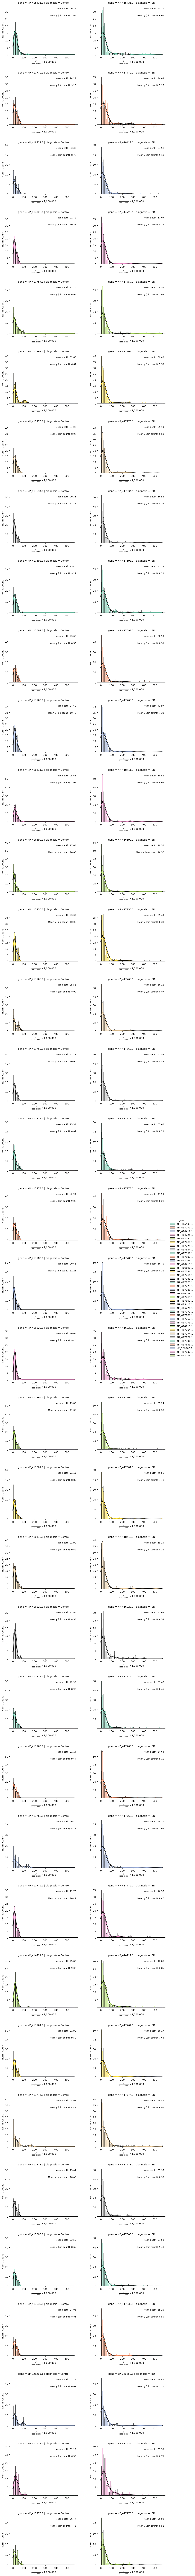

In [18]:
p = sns.displot(
    data=long_table_no_zeros,
    x="mapped_norm_by_read_count_and_contig_length",
    hue="gene",
    kind="hist",
    multiple="layer",
    bins=100,
    palette="Set2",
    col='diagnosis',
    row='gene',
    kde=True,
    #weights="weight",  # normalize using weights
    facet_kws={'sharey': False, 'sharex': False} # sharex must be false to label the x axis!
)

latex_xlabel = r'$\frac{\bar{x}}{\mathrm{read\ count}} \times 1{,}000{,}000$'
row_names = p.row_names

# Loop through each row and align y-limits
for row_idx, row_name in enumerate(row_names):
    # Get all axes in this row
    axes_row = p.axes[row_idx, :]
    
    # Find max y-limit in this row
    max_ylim = max(ax.get_ylim()[1] for ax in axes_row)
    
    # Set uniform y-limit across this row
    for ax in axes_row:
        ax.set_ylim(top=max_ylim)
        ax.set_ylabel("Norm. Count")

for ax in p.axes.flatten():
# Iterate over each Axes in the FacetGrid to customize KDE lines and bar edges
#for ax in p.axes.flatten():
    lines = [line for line in ax.lines if line.get_linestyle() == '-']
    
    # For each existing KDE line, add a black thicker line underneath it
    for line in lines:
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        
        # Plot black thicker line underneath
        ax.plot(
            xdata, ydata,
            color='black',
            linewidth=line.get_linewidth() + 2,  # thicker than original
            solid_capstyle='round',
            zorder=line.get_zorder() - 1  # behind original colored line
        )

    for patch in ax.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(0.5)

    # Get the bar heights (i.e., counts in each bin)
    bin_counts = [patch.get_height() for patch in ax.patches if patch.get_height() > 0]
    
    # Compute mean of the bin heights (mean y-value)
    mean_con = sum(bin_counts) / len(bin_counts) if bin_counts else 0

#for ax in p.axes.flatten():
    # Get gene and diagnosis from facet title
    title = ax.get_title()
    try:
        gene = title.split('|')[0].split('=')[1].strip()
        diagnosis = title.split('|')[1].split('=')[1].strip()
    except IndexError:
        continue  # skip if title parsing fails
    
    # Get the mean value for this facet
    row = mean_depth_no_zeros[(mean_depth_no_zeros['gene'] == gene) & (mean_depth_no_zeros['diagnosis'] == diagnosis)]
    if not row.empty:
        mean_dep = row['mean_depth'].values[0]
        ax.text(
            0.98, 0.95,
            f"Mean depth: {mean_dep:.2f}",
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
        )
        ax.text(
            0.98, 0.81,  # Lower position to stack nicely
            f"Mean y (bin count): {mean_con:.2f}",
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
        )


    ax.tick_params(labelbottom=True)
    ax.set_xlabel(latex_xlabel)

p.fig.subplots_adjust(hspace=0.4, wspace=0.3, bottom=0.20)  # add space for x axis

#plt.savefig('norm_coverage_count_distribution.png', dpi=200, bbox_inches='tight')
plt.show()

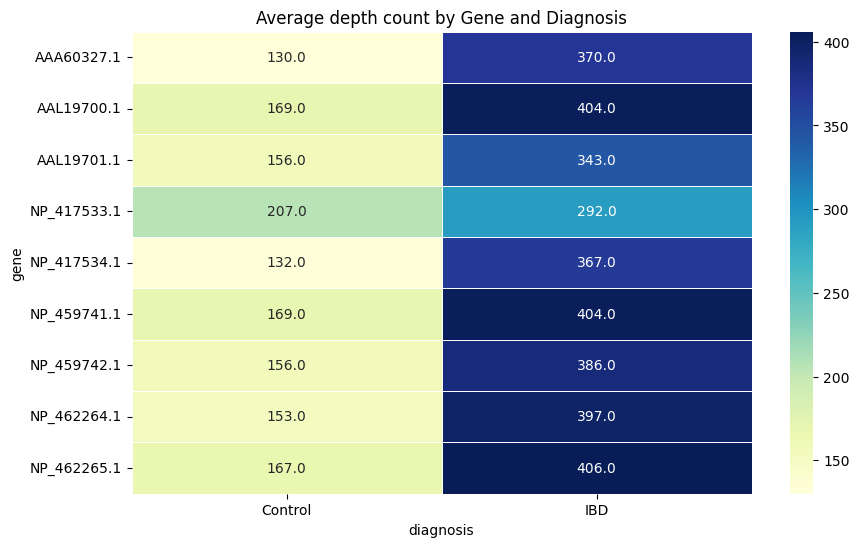

In [56]:
heatmap_data = df_simple_filter.pivot_table(
    index='gene',
    columns='diagnosis',
    values='average_depth',    # 'average_depth', or 'mapped'
    aggfunc='count'      # 'count', or 'mean'
)


plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".1f", linewidths=.5)
plt.title('Average depth count by Gene and Diagnosis')

#plt.savefig('coverage_mean.png', dpi=300, bbox_inches='tight')
plt.show()

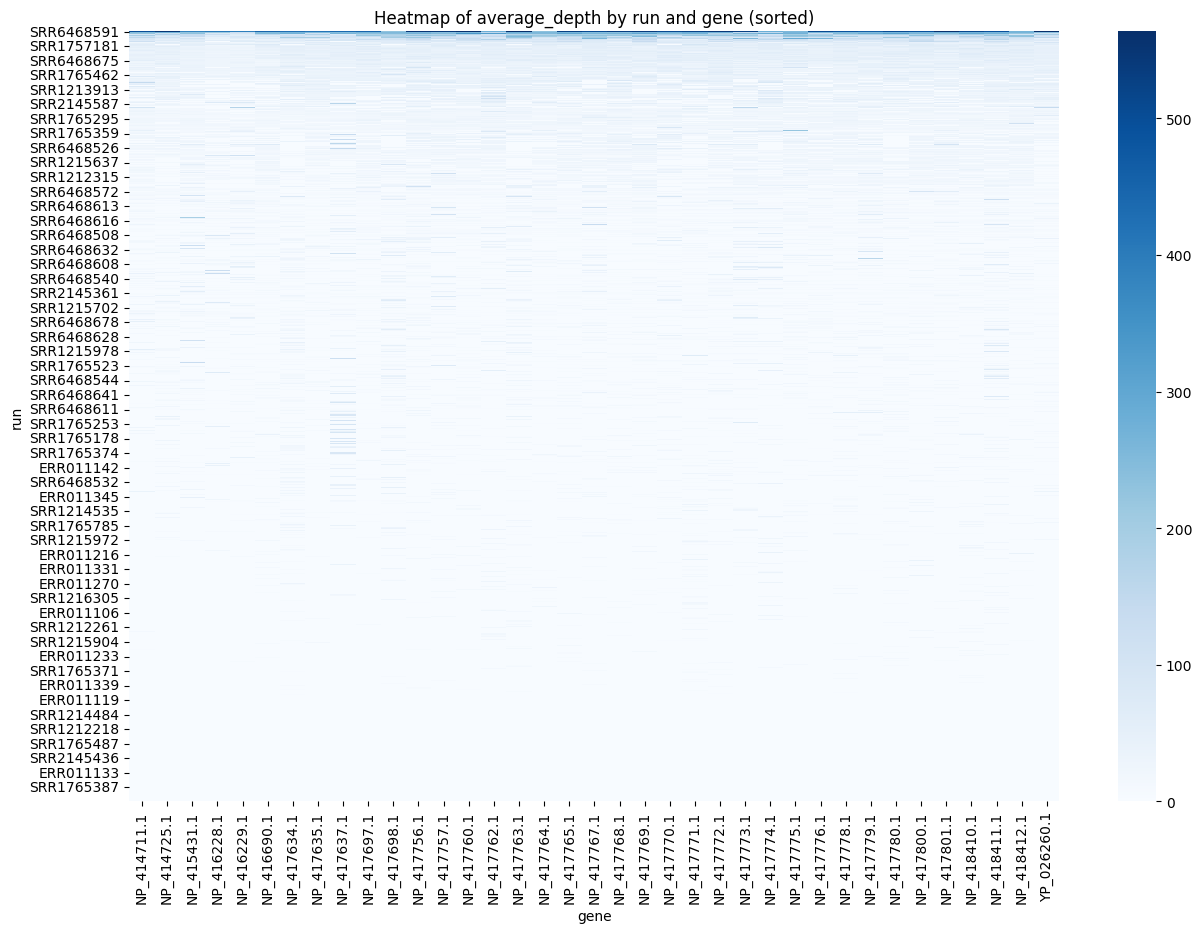

In [20]:
hd = df_simple.pivot_table(index="run", columns="gene", values="mapped_norm_by_read_count_and_contig_length")

hd_filled = hd.fillna(hd.mean().mean())

# Sort by row means to get some order
hd_sorted = hd_filled.loc[hd_filled.mean(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(15,10))
sns.heatmap(hd_sorted, cmap='Blues')
plt.title("Heatmap of average_depth by run and gene (sorted)")
plt.show()

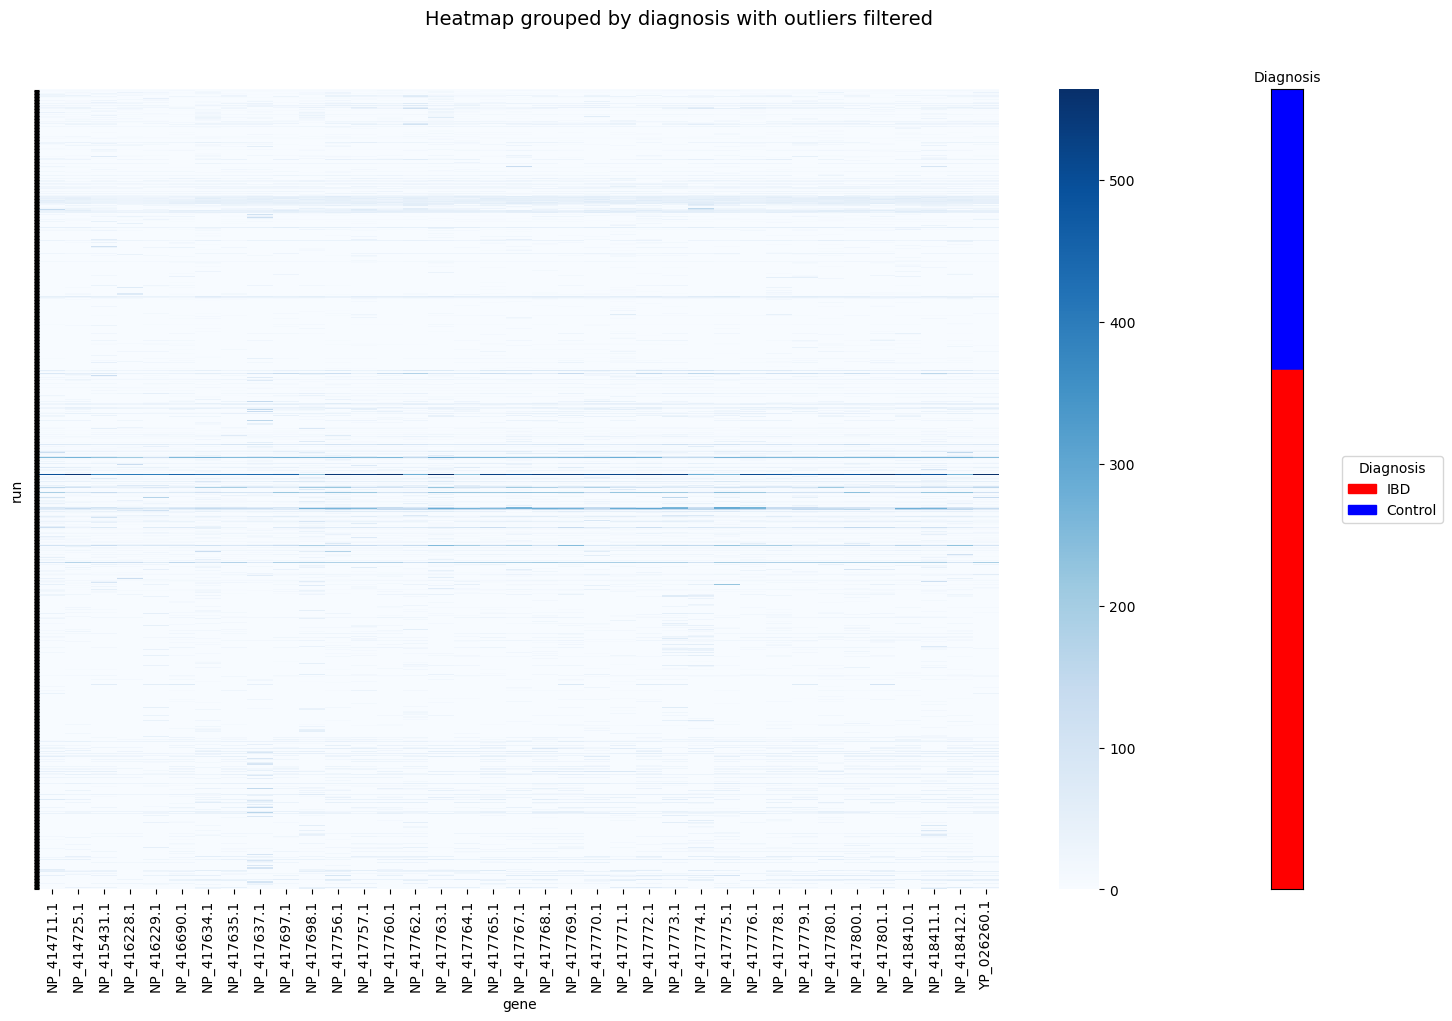

In [25]:

###### filter with the `filtered_df` dataframe or full heatmap with df_simple
hd = df_simple.pivot_table(index="run", columns="gene", values="mapped_norm_by_read_count_and_contig_length") #filtered_df, df_simple?
######

# Diagnosis lookup
run_to_diag = df_simple.groupby('run')['diagnosis'].first()
diag_for_runs = run_to_diag.loc[hd.index]

# Sort by diagnosis first, then by row mean within each group
sorted_runs = diag_for_runs.sort_values().index
hd_sorted = hd.loc[sorted_runs]
diagnosis_sorted = diag_for_runs.loc[sorted_runs]

# Create a palette and color array
palette = {'IBD': 'red', 'Control': 'blue'}
diagnosis_colors = diagnosis_sorted.map(palette)
rgb_colors = [mcolors.to_rgb(c) for c in diagnosis_colors]

# === Plot heatmap + side diagnosis color bar ===
fig = plt.figure(figsize=(16, 10))

# Heatmap axis
ax1 = fig.add_axes([0.1, 0.1, 0.75, 0.8])
sns.heatmap(hd_sorted, cmap='Blues', ax=ax1, cbar=True)
ax1.set_yticks(np.arange(len(hd_sorted)) + 0.5)
ax1.set_yticklabels([])

# Color bar axis for diagnosis strip
ax2 = fig.add_axes([0.87, 0.1, 0.02, 0.8])
color_matrix = np.array(rgb_colors).reshape(-1, 1, 3)
ax2.imshow(color_matrix, aspect='auto')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Diagnosis", fontsize=10)

# Add legend manually
handles = [mpatches.Patch(color=c, label=l) for l, c in palette.items()]
fig.legend(handles=handles, title="Diagnosis", loc="center left", bbox_to_anchor=(0.91, 0.5))

plt.suptitle("Heatmap grouped by diagnosis with outliers filtered", fontsize=14)

plt.savefig('coverage_heatmap_filtered_outliers.png', dpi=300, bbox_inches='tight')

plt.show()

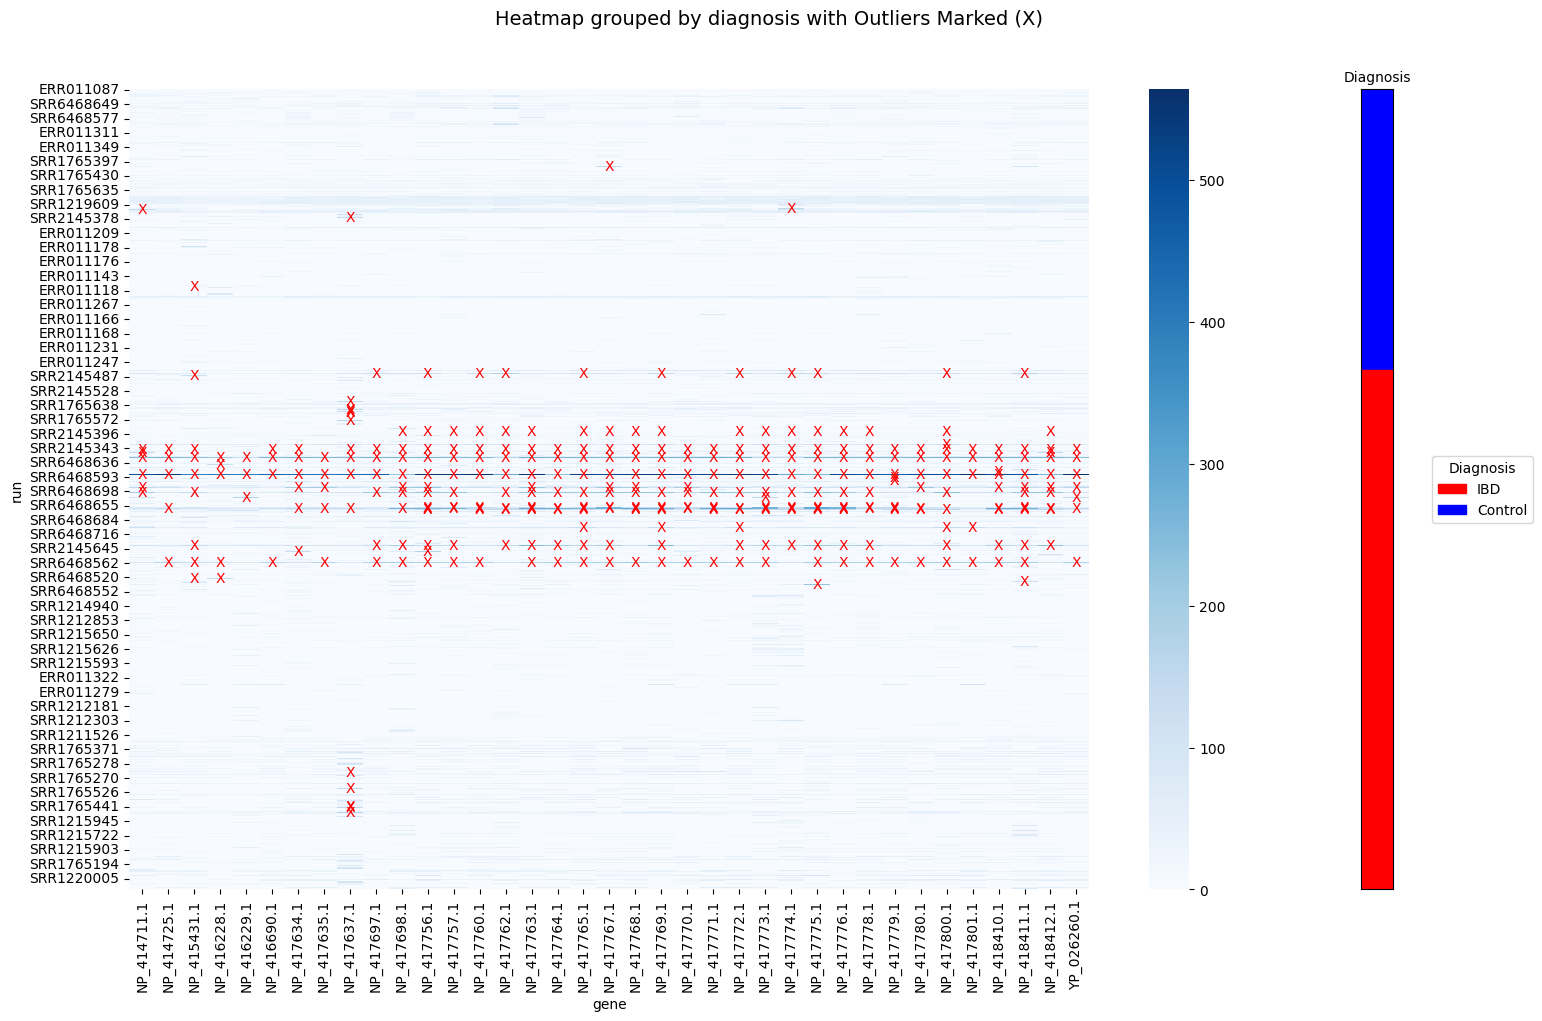

In [26]:
mean_val = long_table['mapped_norm_by_read_count_and_contig_length'].mean()
std_val = long_table['mapped_norm_by_read_count_and_contig_length'].std()

lower_bound = mean_val - 3 * std_val
upper_bound = mean_val + 3 * std_val

#df_simple_filter_outlierless = df_simple_filter[(df_simple_filter['average_depth'] >= lower_bound) & (df_simple_filter['average_depth'] <= upper_bound)]

outlier_mask = (hd_sorted < lower_bound) | (hd_sorted > upper_bound)

diagnosis_colors = diagnosis_sorted.map(palette)
rgb_colors = [mcolors.to_rgb(c) for c in diagnosis_colors]

fig = plt.figure(figsize=(16, 10))

ax = fig.add_axes([0.1, 0.1, 0.75, 0.8])
sns.heatmap(hd_sorted, cmap='Blues', ax=ax, cbar=True)

for y in range(hd_sorted.shape[0]):
    for x in range(hd_sorted.shape[1]):
        if outlier_mask.iloc[y, x]:
            ax.text(x + 0.5, y + 0.5, 'X', ha='center', va='center', color='red', fontsize=10)

ax2 = fig.add_axes([0.87, 0.1, 0.02, 0.8])
color_matrix = np.array(rgb_colors).reshape(-1, 1, 3)
ax2.imshow(color_matrix, aspect='auto')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Diagnosis", fontsize=10)

handles = [mpatches.Patch(color=c, label=l) for l, c in palette.items()]
fig.legend(handles=handles, title="Diagnosis", loc="center left", bbox_to_anchor=(0.91, 0.5))

plt.suptitle("Heatmap grouped by diagnosis with Outliers Marked (X)", fontsize=14)

#plt.savefig('coverage_heatmap_full_marked_outliers.png', dpi=300, bbox_inches='tight')
plt.show()

In [27]:
outlier_mask[outlier_mask.any(axis=1)]


gene        NP_414711.1  NP_414725.1  NP_415431.1  NP_416228.1  NP_416229.1  \
run                                                                           
SRR2145360        False        False        False        False        False   
SRR1215919        False        False        False        False        False   
SRR1215868         True        False        False        False        False   
SRR2145376        False        False        False        False        False   
ERR011193         False        False         True        False        False   
SRR2145467        False        False        False        False        False   
SRR2145480        False        False         True        False        False   
SRR1765651        False        False        False        False        False   
SRR1765618        False        False        False        False        False   
SRR1765617        False        False        False        False        False   
SRR1765610        False        False        False        False        False   
SRR1765570        False        False        False        False        False   
SRR2145412        False        False        False        False        False   
SRR2145323        False        False        False        False        False   
SRR2145320         True         True         True        False        False   
SRR6468618         True        False        False        False        False   
SRR6468629         True         True         True         True         True   
SRR6468638        False        False        False         True        False   
SRR6468586        False        False        False        False        False   
SRR6468591         True         True         True         True         True   
SRR6468593        False        False        False        False        False   
SRR6468600        False        False        False        False        False   
SRR6468692         True        False        False        False        False   
SRR6468700         True        False         True        False        False   
SRR6468707        False        False        False        False         True   
SRR6468661        False        False        False        False        False   
SRR6468663        False         True        False        False        False   
SRR6468664        False        False        False        False        False   
SRR6468501        False        False        False        False        False   
SRR2145635        False        False         True        False        False   
SRR5650060        False        False        False        False        False   
SRR6468561        False         True         True         True        False   
SRR6468521        False        False        False         True        False   
SRR6468524        False        False         True        False        False   
SRR6468527        False        False        False        False        False   
SRR6468554        False        False        False        False        False   
SRR1765314        False        False        False        False        False   
SRR1765515        False        False        False        False        False   
SRR1765439        False        False        False        False        False   
SRR1765445        False        False        False        False        False   
SRR1765465        False        False        False        False        False   

gene        NP_416690.1  NP_417634.1  NP_417635.1  NP_417637.1  NP_417697.1  \
run                                                                           
SRR2145360        False        False        False        False        False   
SRR1215919        False        False        False        False        False   
SRR1215868        False        False        False        False        False   
SRR2145376        False        False        False         True        False   
ERR011193         False        False        False        False        False   
SRR2145467        False        False        False

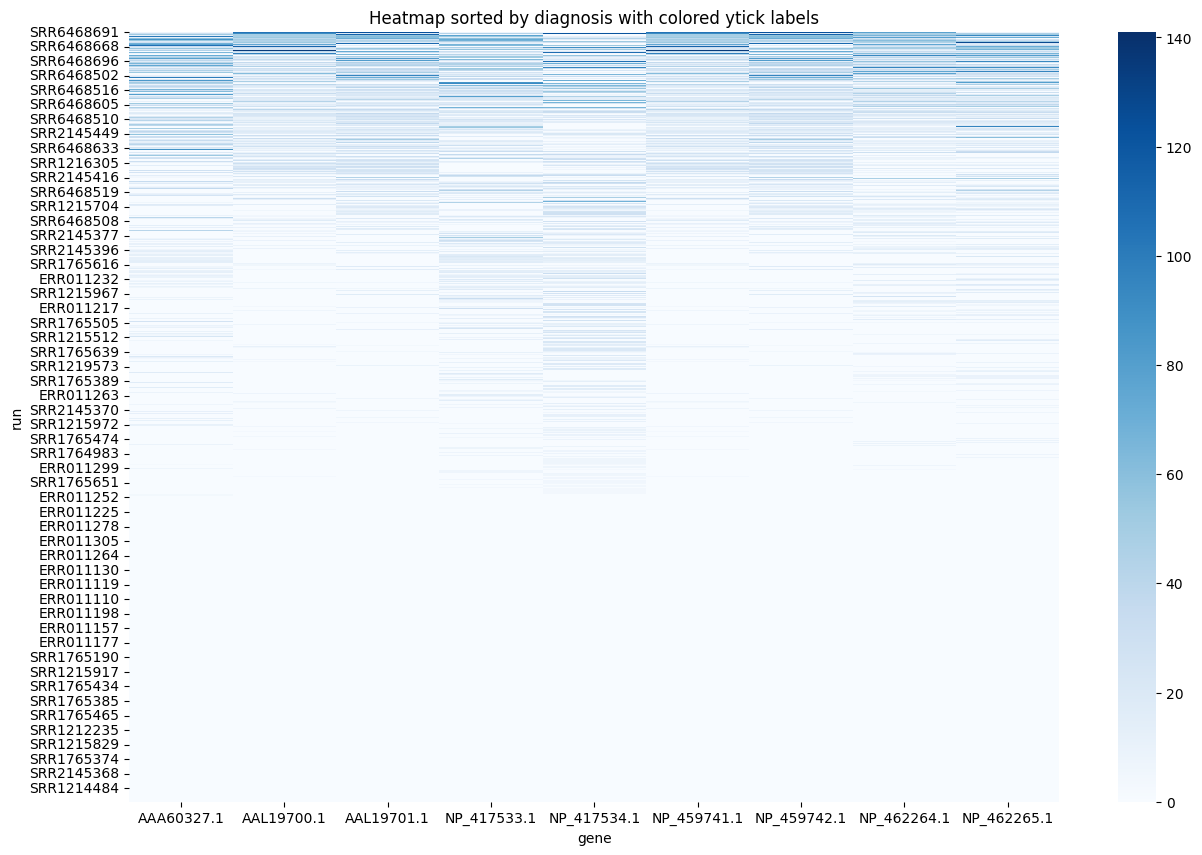

In [58]:
# Calculate mean and std deviation
mean_val = df_simple['average_depth'].mean()
std_val = df_simple['average_depth'].std()

# Define lower and upper bounds
lower_bound = mean_val - 3 * std_val
upper_bound = mean_val + 3 * std_val

# Filter rows where average_depth is within ±3 SD
filtered_df = df_simple[(df_simple['average_depth'] >= lower_bound) & (df_simple['average_depth'] <= upper_bound)]

hd = filtered_df.pivot_table(index="run", columns="gene", values="average_depth")

hd_filled = hd.fillna(hd.mean().mean())

# Sort by row means to get some order
hd_sorted = hd_filled.loc[hd_filled.mean(axis=1).sort_values(ascending=False).index]

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(hd_sorted, cmap='Blues', ax=ax, cbar=True)

plt.title("Heatmap sorted by diagnosis with colored ytick labels")
plt.show()

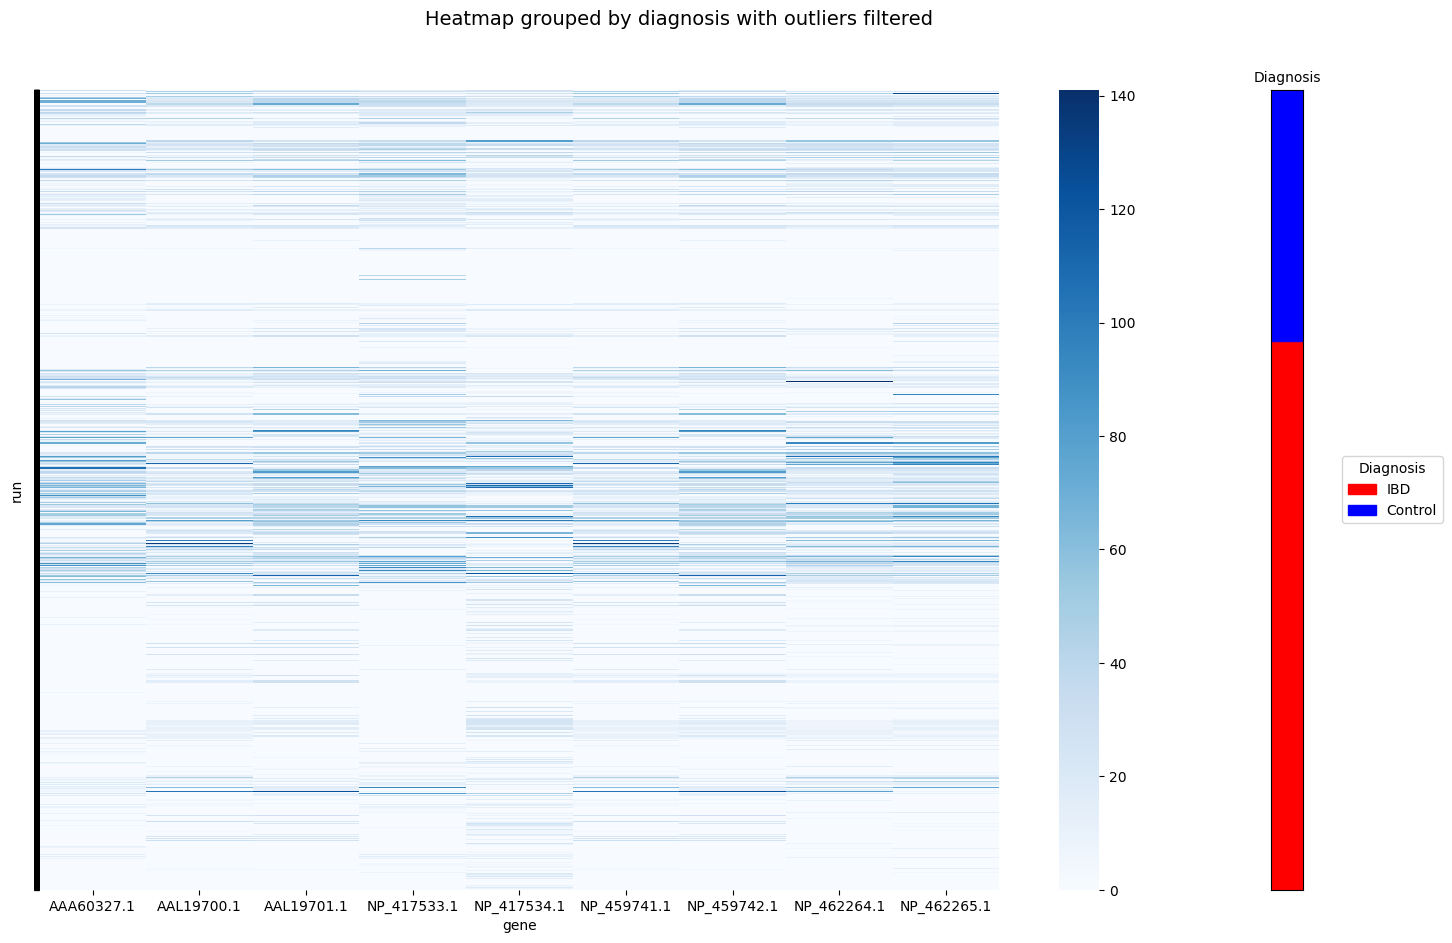

In [59]:

###### filter with the `filtered_df` dataframe or full heatmap with df_simple
hd = filtered_df.pivot_table(index="run", columns="gene", values="average_depth") #filtered_df, df_simple?
hd_filled = hd.fillna(hd.mean().mean())
######

# Diagnosis lookup
run_to_diag = df_simple.set_index('run')['diagnosis']
diag_for_runs = run_to_diag.loc[hd_filled.index]

# Sort by diagnosis first, then by row mean within each group
sorted_runs = diag_for_runs.sort_values().index
hd_sorted = hd_filled.loc[sorted_runs]
diagnosis_sorted = diag_for_runs.loc[sorted_runs]

# Create a palette and color array
palette = {'IBD': 'red', 'Control': 'blue'}
diagnosis_colors = diagnosis_sorted.map(palette)
rgb_colors = [mcolors.to_rgb(c) for c in diagnosis_colors]

# === Plot heatmap + side diagnosis color bar ===
fig = plt.figure(figsize=(16, 10))

# Heatmap axis
ax1 = fig.add_axes([0.1, 0.1, 0.75, 0.8])
sns.heatmap(hd_sorted, cmap='Blues', ax=ax1, cbar=True)
ax1.set_yticks(np.arange(len(hd_sorted)) + 0.5)
ax1.set_yticklabels([])

# Color bar axis for diagnosis strip
ax2 = fig.add_axes([0.87, 0.1, 0.02, 0.8])
color_matrix = np.array(rgb_colors).reshape(-1, 1, 3)
ax2.imshow(color_matrix, aspect='auto')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Diagnosis", fontsize=10)

# Add legend manually
handles = [mpatches.Patch(color=c, label=l) for l, c in palette.items()]
fig.legend(handles=handles, title="Diagnosis", loc="center left", bbox_to_anchor=(0.91, 0.5))

plt.suptitle("Heatmap grouped by diagnosis with outliers filtered", fontsize=14)

plt.savefig('coverage_heatmap_filtered_outliers.png', dpi=300, bbox_inches='tight')

plt.show()